**AdaBoost - Viz: Decision Boundary**

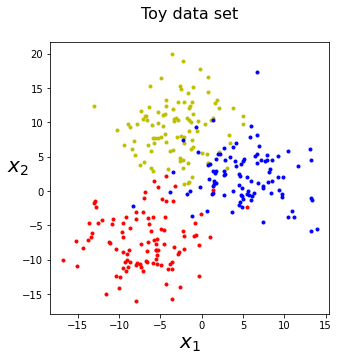

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, n_features=2, centers=3,
                  cluster_std=4, random_state=42)

# Plot data
plt.figure(figsize=(5, 5))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", marker='.')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", marker='.')
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rd", marker='.')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.title("Toy data set\n", fontsize=16)
plt.show()

In [ ]:
# https://github.com/lee-ju/stat_modeling

def compute_decision_boundaries(clf, x, y):
    mn_x1, mx_x1 = int(x[:,0].min())-1, int(x[:,0].max()+1)
    mn_x2, mx_x2 = int(x[:,1].min())-1, int(x[:,1].max()+1)
    x1s = np.linspace(mn_x1, mx_x1, 300)
    x2s = np.linspace(mn_x1, mx_x2, 300)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    
    axes = [mn_x1, mx_x1, mn_x2, mx_x2]
    return x1, x2, y_pred, axes

def plot_feature_space(clf, x, y):
    x1, x2, y_pred, axes = compute_decision_boundaries(clf, x, y)
    custom_cmap = ListedColormap(['y','b','r'])

    plt.figure(figsize=(5, 5))
    plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.1)
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo", marker='.')
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs", marker='.')
    plt.plot(x[:, 0][y==2], x[:, 1][y==2], "rd", marker='.')
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

clf_dt = DecisionTreeClassifier(max_depth=2).fit(X, y)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2).fit(X, y)
clf_ab = AdaBoostClassifier(n_estimators=100).fit(X, y)

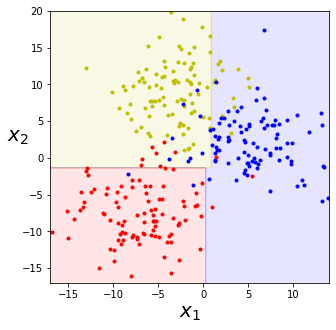

In [ ]:
plot_feature_space(clf_dt, X, y)

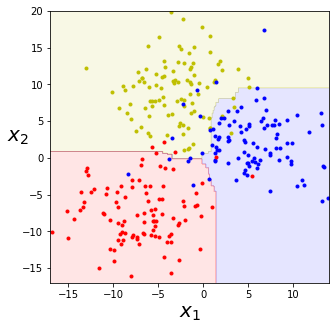

In [ ]:
plot_feature_space(clf_rf, X, y)

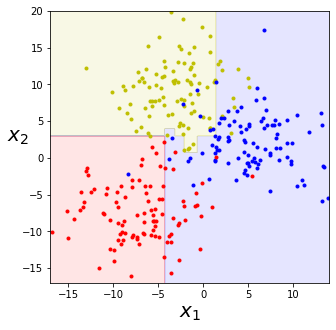

In [ ]:
plot_feature_space(clf_ab, X, y)

**AdaBoost - MNIST Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


In [ ]:
X = mnist.data.astype('float32').to_numpy() # 0 ~ 255
X /= 255.0 # 0 ~ 1

y = mnist.target.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

trn_X, tst_X, trn_y, tst_y = train_test_split(X, y, test_size=0.3,
                                              random_state=1234)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

num_stumps = [10, 30, 50, 70]

tst_acc = []

for T in num_stumps:
  print('Number of Stumps =', T)
  clf = AdaBoostClassifier(n_estimators=T).fit(trn_X, trn_y)

  prd = clf.predict(tst_X)

  tst_acc.append(accuracy_score(y_true=tst_y, y_pred=prd))

Number of Stumps = 10
Number of Stumps = 30
Number of Stumps = 50
Number of Stumps = 70


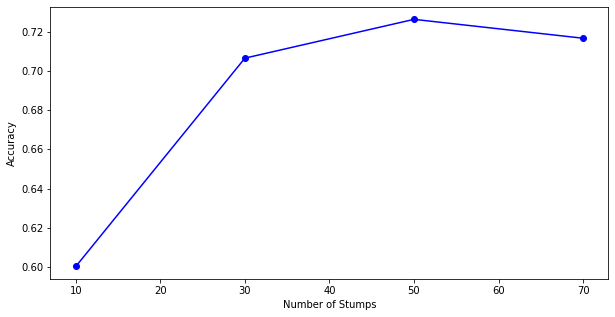

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(num_stumps, tst_acc, 'b-', marker='o')

plt.xlabel('Number of Stumps')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
AB = AdaBoostClassifier(n_estimators=50).fit(trn_X, trn_y)
prd_AB = AB.predict(tst_X)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

DT = DecisionTreeClassifier(max_depth=8).fit(trn_X, trn_y)
prd_DT = DT.predict(tst_X)

RF = RandomForestClassifier(n_estimators=70, max_depth=8).fit(trn_X, trn_y)
prd_RF = RF.predict(tst_X)

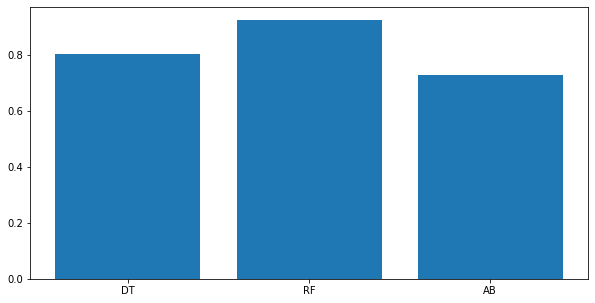

In [ ]:
from sklearn.metrics import accuracy_score

acc_DT = accuracy_score(tst_y, prd_DT)
acc_RF = accuracy_score(tst_y, prd_RF)
acc_AB = accuracy_score(tst_y, prd_AB)
accs = [acc_DT, acc_RF, acc_AB]

plt.figure(figsize=(10, 5))

xx = [1, 2, 3]
clfs = ['DT', 'RF', 'AB']

plt.bar(xx, accs)
plt.xticks(xx, clfs)
plt.show()